# tSNE

## circles

In [1]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['royalblue', 'red', 'deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

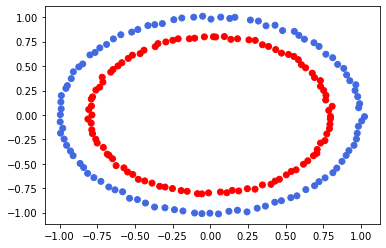

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 200, noise = 0.01)
plt.scatter(X[:,0], X[:,1], c = vectorizer(y))

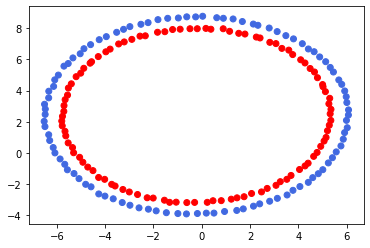

In [3]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 40, random_state = 42)
X_reduced_tsne = tsne.fit_transform(X)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c= vectorizer(y))

In [4]:
tsne = TSNE(n_components = 2, perplexity = 5, random_state = 42)
X_5 = tsne.fit_transform(X)
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 42)
X_30 = tsne.fit_transform(X)
tsne = TSNE(n_components = 2, perplexity = 40, random_state = 42)
X_40 = tsne.fit_transform(X)
tsne = TSNE(n_components = 2, perplexity = 100, random_state = 42)
X_100 = tsne.fit_transform(X)

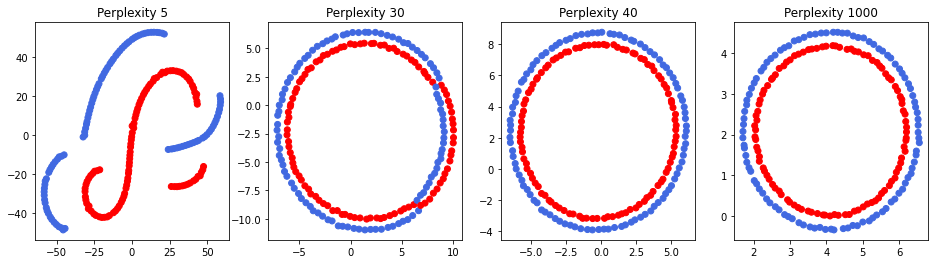

In [5]:
plt.figure(figsize = (16, 4))
plt.subplot(141)
plt.gca().set_title('Perplexity 5')
plt.scatter(X_5[:,0], X_5[:,1], c=vectorizer(y))

plt.subplot(142)
plt.gca().set_title('Perplexity 30')
plt.scatter(X_30[:,0], X_30[:,1], c=vectorizer(y))

plt.subplot(143)
plt.gca().set_title('Perplexity 40')
plt.scatter(X_40[:,0], X_40[:,1], c=vectorizer(y))

plt.subplot(144)
plt.gca().set_title('Perplexity 1000')
plt.scatter(X_100[:,0], X_100[:,1], c=vectorizer(y))


## mnist

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95)

In [8]:
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X_train)

In [9]:
tsne = TSNE(n_components = 2, perplexity = 100, random_state = 42)
X_100 = tsne.fit_transform(X_train)

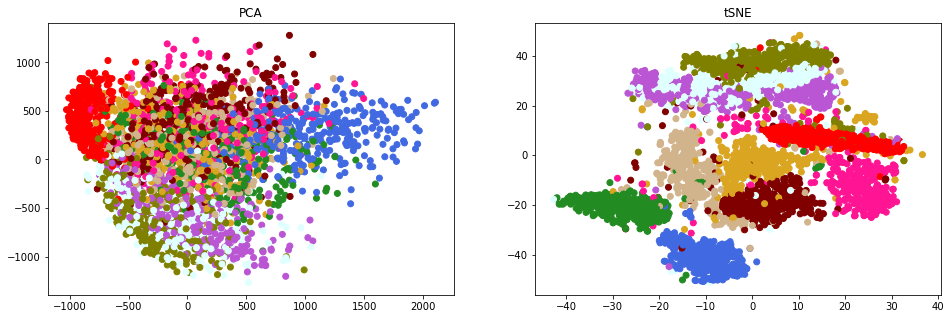

In [10]:
plt.figure(figsize = (16, 5))
ax1= plt.subplot(121)
plt.gca().set_title('PCA')
plt.scatter(X_PCA[:,0], X_PCA[:,1], c= vectorizer(y_train), label= colors)

ax1= plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_100[:,0], X_100[:,1], c= vectorizer(y_train), label= y_train)

In [11]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_train)

In [12]:
from sklearn.manifold import LocallyLinearEmbedding
LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_LLE = LLE.fit_transform(X_train)

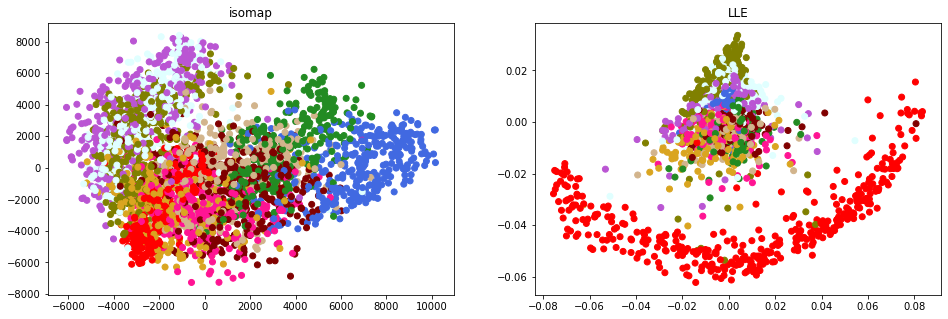

In [13]:
plt.figure(figsize = (16, 5))
ax1= plt.subplot(121)
plt.gca().set_title('isomap')
plt.scatter(X_isomap[:,0], X_isomap[:,1], c= vectorizer(y_train), label= colors)

ax1= plt.subplot(122)
plt.gca().set_title('LLE')
plt.scatter(X_LLE[:,0], X_LLE[:,1], c= vectorizer(y_train), label= y_train)

## swiss roll

In [14]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)

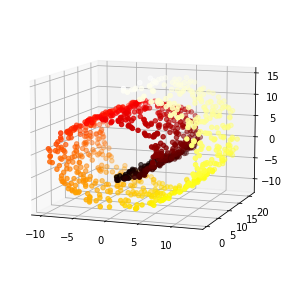

In [15]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = t, cmap = plt.cm.hot)
ax.view_init(10, -70)

In [16]:
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
tsne = TSNE(n_components = 2, random_state = 42)
X_tsne = tsne.fit_transform(X)

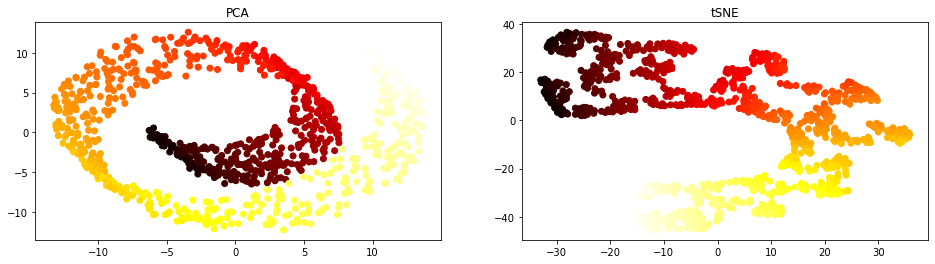

In [17]:
plt.figure(figsize = (16, 4))
plt.subplot(121)
plt.gca().set_title('PCA')
plt.scatter(X_PCA[:,0], X_PCA[:,1], c = t, cmap = plt.cm.hot)

plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = t, cmap = plt.cm.hot)

In [18]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

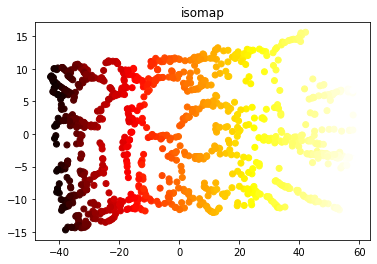

In [19]:
plt.gca().set_title('isomap')
plt.scatter(X_isomap[:,0], X_isomap[:,1], c = t, cmap = plt.cm.hot)

In [20]:
LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=15)
X_LLE = LLE.fit_transform(X)

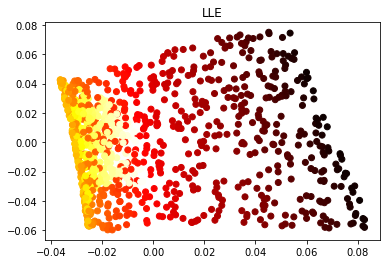

In [21]:
plt.gca().set_title('LLE')
plt.scatter(X_LLE[:,0], X_LLE[:,1], c = t, cmap = plt.cm.hot)